# __Health Insurance Cross Sell Prediction__

This notebook is aims to build a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# 1. Importing Relevant Libraries

Importing the Relevant Libraries and Data Required for building our model!

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
sns.set()
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')

# 2. Data Processing

In [6]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
df.drop('id',axis=1,inplace=True) #Dropping the ID column

In [8]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [9]:
cols_to_label=[]
for i in df.columns:
    if df[i].dtypes == 'O':
        cols_to_label.append(i)

cols_to_label

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

Now we apply Label Encoder to our Categorical Data. 

In [10]:
df[cols_to_label] = df[cols_to_label].apply(LabelEncoder().fit_transform) 

In [11]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


# 3. Exploratory Data Analysis

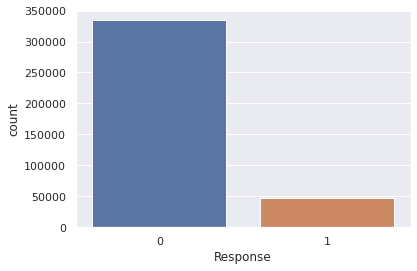

In [12]:
sns.countplot(df['Response'])

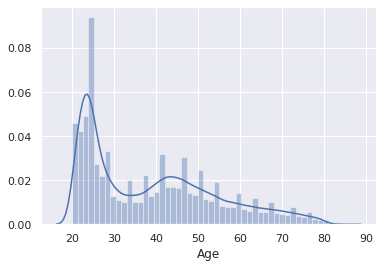

In [13]:
sns.distplot(df['Age'])

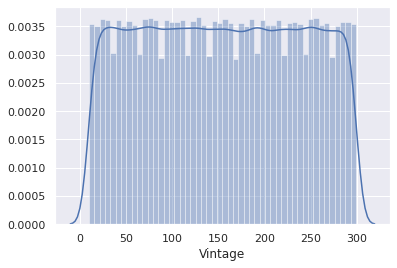

In [14]:
sns.distplot(df['Vintage'])

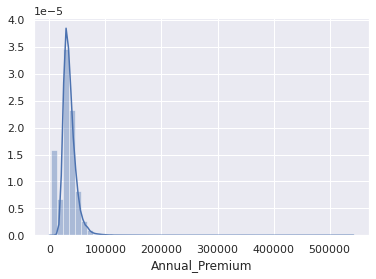

In [15]:
sns.distplot(df['Annual_Premium'])

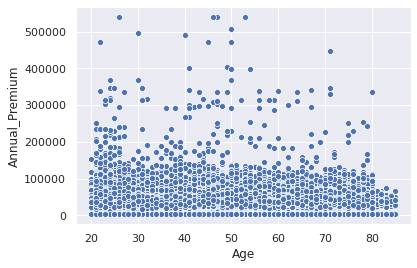

In [16]:
sns.scatterplot(x='Age', y='Annual_Premium', data=df)

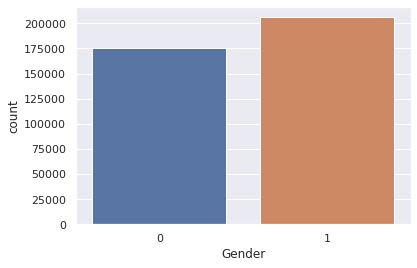

In [17]:
sns.countplot(df['Gender'])

In [18]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

Gender
1    206089
0    175020
Name: Gender, dtype: int64
Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64
Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64
Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0   

# 4. Data Scaling

In [19]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [20]:
cols_to_scale = ['Age','Annual_Premium','Policy_Sales_Channel','Vintage']

scaler = StandardScaler().fit(df[cols_to_scale])
df[cols_to_scale] = pd.DataFrame(scaler.transform(df[cols_to_scale]), columns=cols_to_scale)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.333777,1,28.0,0,2,1,0.574539,-1.587234,0.748795,1
1,1,2.396751,1,3.0,0,0,0,0.172636,-1.587234,0.342443,0
2,1,0.527181,1,28.0,0,2,1,0.449053,-1.587234,-1.521998,1
3,1,-1.148985,1,11.0,1,1,0,-0.113018,0.737321,0.581474,0
4,0,-0.633242,1,41.0,1,1,0,-0.178259,0.737321,-1.378580,0


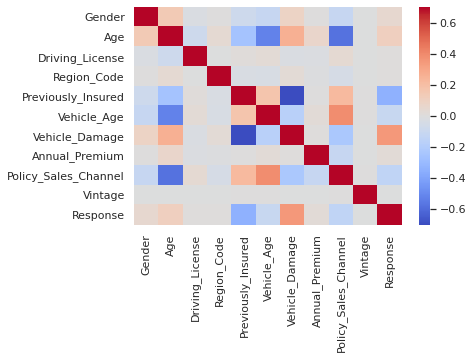

In [21]:
sns.heatmap(df.corr() ,cmap='coolwarm', vmax=0.7, vmin=-0.7)

# 5. Data Modelling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Response', axis=1), df['Response'], test_size=0.2)

In [23]:
model1 = LogisticRegression(random_state = 365).fit(X_train, y_train)
preds = model1.predict(X_test)
print(f'The accuracy score of Logistic Regression model is: {accuracy_score(preds, y_test)}')

The accuracy score of Logistic Regression model is: 0.8767809818687518


In [24]:
model2 = XGBClassifier().fit(X_train, y_train)
preds = model2.predict(X_test)
print(f'The accuracy score of XGBClassifier model is: {accuracy_score(preds, y_test)}')

The accuracy score of XGBClassifier model is: 0.8767416231534203


If you liked my work please upvote!